# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [82]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [83]:
# 检查数据维度
data.shape

(112915, 11)

In [84]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [85]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/home/tianyu/.julia/conda/3/envs/few_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

In [87]:
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
112910,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0
112911,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
112912,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
112913,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [88]:
# 提示：查看test_test_split函数
from sklearn.model_selection import train_test_split

# 切分数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 查看训练集和测试集的形状
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)


Training set shape:  (76053, 10)
Testing set shape:  (32595, 10)


Distribution of Target Variable (Train):
0    70898
1     5155
Name: SeriousDlqin2yrs, dtype: int64

Distribution of Target Variable (Test):
0    30424
1     2171
Name: SeriousDlqin2yrs, dtype: int64


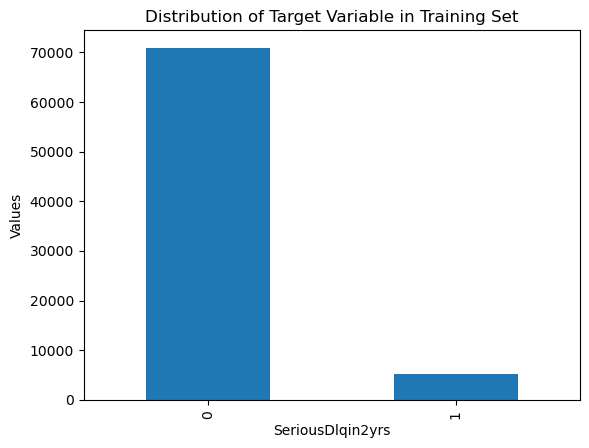

In [89]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
# 查看正负样本的分布情况
print("Distribution of Target Variable (Train):")
print(y_train.value_counts())

print("\nDistribution of Target Variable (Test):")
print(y_test.value_counts())


# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
import matplotlib.pyplot as plt

# 绘制训练集中SeriousDlqin2yrs的分布
y_train.value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable in Training Set')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Values')
plt.show()



#### 2.数据预处理之离散化
在这里没有考虑使用离散化和独热编码

In [60]:
# # 请对年龄按照3岁一个区间进行离散化
# # 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
# import numpy as np

# # 计算年龄的最大值和最小值
# min_age_train = X_train['age'].min()
# max_age_train = X_train['age'].max()
# min_age_test = X_test['age'].min()
# max_age_test = X_test['age'].max()

# min_age=min(min_age_train,min_age_test)
# max_age=max(max_age_train,max_age_test)
# print(min_age,max_age)
# # 创建分桶边界，确保最大年龄被包含
# bins = np.arange(min_age, max_age + 3, 3)  # 3岁一个区间
# #训练集
# # 使用pd.cut进行离散化
# X_train['age_binned'] = pd.cut(X_train['age'], bins=bins, include_lowest=True)

# # 查看离散化结果
# print(X_train[['age', 'age_binned']].head())

# #测试集
# # 使用pd.cut进行离散化
# X_test['age_binned'] = pd.cut(X_test['age'], bins=bins, include_lowest=True)

# # 查看离散化结果
# print(X_test[['age', 'age_binned']].head())



0.0 103.0
         age    age_binned
64329   27.0  (24.0, 27.0]
70087   83.0  (81.0, 84.0]
77642   72.0  (69.0, 72.0]
6017    56.0  (54.0, 57.0]
106521  83.0  (81.0, 84.0]
         age    age_binned
107294  61.0  (60.0, 63.0]
39317   77.0  (75.0, 78.0]
40606   50.0  (48.0, 51.0]
68931   58.0  (57.0, 60.0]
20745   57.0  (54.0, 57.0]


/home/tianyu/.julia/conda/3/envs/few_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/tianyu/.julia/conda/3/envs/few_env/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 3.数据预处理之独热向量编码

In [72]:
# # 请对上述分箱后的年龄段进行独热向量编码
# # 提示：使用pandas的get_dummies完成
# # 对分箱后的年龄段进行独热向量编码
# age_dummies_train = pd.get_dummies(X_train['age_binned'], prefix='age')
# age_dummies_test = pd.get_dummies(X_test['age_binned'], prefix='age')
# # 查看独热编码结果
# print(age_dummies_train.head())
# print(age_dummies_test.head())

# # 将独热编码的DataFrame附加回原始数据集
# X_train = pd.concat([X_train, age_dummies_train], axis=1)
# X_train=X_train.drop('age', axis=1)
# X_test = pd.concat([X_test, age_dummies_test], axis=1)
# X_test=X_test.drop('age', axis=1)

        age_(-0.001, 3.0]  age_(3.0, 6.0]  age_(6.0, 9.0]  age_(9.0, 12.0]  \
64329                   0               0               0                0   
70087                   0               0               0                0   
77642                   0               0               0                0   
6017                    0               0               0                0   
106521                  0               0               0                0   

        age_(12.0, 15.0]  age_(15.0, 18.0]  age_(18.0, 21.0]  \
64329                  0                 0                 0   
70087                  0                 0                 0   
77642                  0                 0                 0   
6017                   0                 0                 0   
106521                 0                 0                 0   

        age_(21.0, 24.0]  age_(24.0, 27.0]  age_(27.0, 30.0]  \
64329                  0                 1                 0   
70087             

#### 4.数据预处理之幅度缩放

In [90]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理

from sklearn.preprocessing import StandardScaler

# 创建一个StandardScaler对象
scaler = StandardScaler()

# 选择连续值特征进行幅度缩放
# 假设X是包含你想要缩放的特征的DataFrame
continuous_features_train = X_train.columns  # 或者是你选择的连续特征列名列表
continuous_features_test = X_test.columns 
# 对特征进行标准化处理
X_train = scaler.fit_transform(X_train.to_numpy())
X_test= scaler.fit_transform(X_test.to_numpy())
# 将缩放后的数据转换回DataFrame
X_train= pd.DataFrame(X_train, columns=continuous_features_train)
X_test= pd.DataFrame(X_test, columns=continuous_features_test)
# 查看缩放后的特征
print(X_train.head())
print(X_test.head())


   RevolvingUtilizationOfUnsecuredLines       age  \
0                             -0.022432 -1.686168   
1                             -0.022674  2.192767   
2                             -0.022717  1.430833   
3                             -0.022774  0.322566   
4                             -0.022716  2.192767   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                             -0.106906   0.090374      -0.244427   
1                             -0.106906  -0.577713       0.192130   
2                             -0.106906  -1.298500      -0.078536   
3                             -0.106906  -0.177879       0.223765   
4                             -0.106906  -0.496932      -0.333004   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                        -0.327599                -0.060947   
1                         0.062406                -0.060947   
2                        -0.327599                -0.060947   
3             

In [91]:
X_train.to_numpy()

array([[-0.0224317 , -1.68616803, -0.10690634, ..., -0.94396074,
        -0.05438132,  0.12370193],
       [-0.02267421,  2.19276673, -0.10690634, ..., -0.01113702,
        -0.05438132, -0.74386565],
       [-0.02271737,  1.43083312, -0.10690634, ..., -0.94396074,
        -0.05438132, -0.74386565],
       ...,
       [-0.02184994,  1.08449966, -0.10690634, ..., -0.01113702,
        -0.05438132, -0.74386565],
       [-0.01927746, -1.54763465,  0.17284964, ..., -0.94396074,
        -0.05438132,  1.8588371 ],
       [-0.02248282,  0.46109943,  0.45260561, ...,  0.92168669,
        -0.05438132, -0.74386565]])

In [92]:
type(X_train[continuous_features_train])

pandas.core.frame.DataFrame

In [93]:
type(X_train)

pandas.core.frame.DataFrame

In [99]:
X_train.iloc[0:,0:]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.022432,-1.686168,-0.106906,0.090374,-0.244427,-0.327599,-0.060947,-0.943961,-0.054381,0.123702
1,-0.022674,2.192767,-0.106906,-0.577713,0.192130,0.062406,-0.060947,-0.011137,-0.054381,-0.743866
2,-0.022717,1.430833,-0.106906,-1.298500,-0.078536,-0.327599,-0.060947,-0.943961,-0.054381,-0.743866
3,-0.022774,0.322566,-0.106906,-0.177879,0.223765,-0.132596,-0.060947,0.921687,-0.054381,1.858837
4,-0.022716,2.192767,-0.106906,-0.496932,-0.333004,-1.107608,-0.060947,-0.943961,-0.054381,-0.743866
...,...,...,...,...,...,...,...,...,...,...
76048,-0.020751,-0.231567,0.172850,-0.012784,0.239582,1.622425,-0.060947,-0.011137,-0.054381,1.858837
76049,-0.019201,-1.616901,-0.106906,-1.067234,-0.269735,-1.302611,-0.060947,-0.943961,-0.054381,-0.743866
76050,-0.021850,1.084500,-0.106906,-0.171493,-0.187485,-0.912606,-0.060947,-0.011137,-0.054381,-0.743866
76051,-0.019277,-1.547635,0.172850,-0.929873,-0.187485,-0.717604,-0.060947,-0.943961,-0.054381,1.858837


#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [101]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

# 创建逻辑回归模型实例
lr =LogisticRegression(C=100.0, random_state=0, penalty='l2')

# 使用训练数据拟合模型
lr.fit(X_train, y_train)

# 输出模型的系数
print("Coefficients:", lr.coef_)

# 如果你想要更好地理解每个特征的重要性，可以将系数与特征名称一起打印出来
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': lr.coef_[0]})
print(feature_importance.sort_values(by="Importance", ascending=False))




Coefficients: [[-0.01428343 -0.3642989   1.72879999  0.31210525 -0.11519842 -0.09188338
   1.68957186 -0.19643174 -3.24844059  0.11639394]]
                                Feature  Importance
2  NumberOfTime30-59DaysPastDueNotWorse    1.728800
6               NumberOfTimes90DaysLate    1.689572
3                             DebtRatio    0.312105
9                    NumberOfDependents    0.116394
0  RevolvingUtilizationOfUnsecuredLines   -0.014283
5       NumberOfOpenCreditLinesAndLoans   -0.091883
4                         MonthlyIncome   -0.115198
7          NumberRealEstateLoansOrLines   -0.196432
1                                   age   -0.364299
8  NumberOfTime60-89DaysPastDueNotWorse   -3.248441


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [104]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 创建逻辑回归模型实例
lr= LogisticRegression(solver='liblinear')  # 对于L1正则化，需要选择适合的求解器，如'liblinear'

# 定义要搜索的参数网格
param_grid = {
    'penalty': ['l1', 'l2'],  # 正则化类型
    'C': [1, 10, 100, 500]    # 正则化强度的倒数
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', refit=True)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# 输出最好的超参数
# 输出最好的模型
# 使用最佳参数在整个训练集上重新训练模型
best_model = grid_search.best_estimator_

# 可选：使用最佳模型在测试集上进行预测和评估
y_test_pred = best_model.predict(X_test)
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))



Best parameters:  {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.93
(accuracy_score) Test accuracy: 0.9339


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [106]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score

# 使用最佳模型在测试集上进行预测
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]  # 获取正类的预测概率，用于计算AUC

# 计算各种测试指标
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_prob)
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# 打印测试指标
print("Accuracy: {:.4f}".format(accuracy))
print("Recall: {:.4f}".format(recall))
print("AUC: {:.4f}".format(auc))
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score: {:.4f}".format(f1))



Accuracy: 0.9339
Recall: 0.0461
AUC: 0.6980
Confusion Matrix:
 [[30341    83]
 [ 2071   100]]
F1 Score: 0.0850


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [107]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
import numpy as np

# 设置不同的阈值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# 循环不同的阈值
for thresh in thresholds:
    # 根据阈值调整预测结果
    y_test_pred_thresh = (y_test_prob >= thresh).astype(int)

    # 计算并打印混淆矩阵和其他评估指标
    conf_matrix = confusion_matrix(y_test, y_test_pred_thresh)
    accuracy = accuracy_score(y_test, y_test_pred_thresh)
    recall = recall_score(y_test, y_test_pred_thresh)
    f1 = f1_score(y_test, y_test_pred_thresh)

    print(f"Threshold: {thresh}")
    print("Confusion Matrix:\n", conf_matrix)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")



Threshold: 0.1
Confusion Matrix:
 [[26778  3646]
 [ 1253   918]]
Accuracy: 0.8497
Recall: 0.4228
F1 Score: 0.2726

Threshold: 0.2
Confusion Matrix:
 [[29799   625]
 [ 1754   417]]
Accuracy: 0.9270
Recall: 0.1921
F1 Score: 0.2596

Threshold: 0.3
Confusion Matrix:
 [[30178   246]
 [ 1927   244]]
Accuracy: 0.9333
Recall: 0.1124
F1 Score: 0.1834

Threshold: 0.4
Confusion Matrix:
 [[30291   133]
 [ 2018   153]]
Accuracy: 0.9340
Recall: 0.0705
F1 Score: 0.1245

Threshold: 0.5
Confusion Matrix:
 [[30341    83]
 [ 2071   100]]
Accuracy: 0.9339
Recall: 0.0461
F1 Score: 0.0850

Threshold: 0.6
Confusion Matrix:
 [[30371    53]
 [ 2104    67]]
Accuracy: 0.9338
Recall: 0.0309
F1 Score: 0.0585

Threshold: 0.7
Confusion Matrix:
 [[30390    34]
 [ 2128    43]]
Accuracy: 0.9337
Recall: 0.0198
F1 Score: 0.0383

Threshold: 0.8
Confusion Matrix:
 [[30403    21]
 [ 2143    28]]
Accuracy: 0.9336
Recall: 0.0129
F1 Score: 0.0252

Threshold: 0.9
Confusion Matrix:
 [[30418     6]
 [ 2167     4]]
Accuracy: 0.933

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [111]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 创建逻辑回归模型实例
lr = LogisticRegression()

# 使用递归特征消除（RFE）进行特征选择
selector = RFE(lr, n_features_to_select=5, step=1)  # 选择5个最重要的特征
selector = selector.fit(X_train, y_train)

# 获取选定的特征
selected_features = X_train.columns[selector.support_]
print("Selected features:", selected_features)

# 使用选定的特征重新建模

lr.fit(X_train.iloc[:, selector.support_], y_train)

# 在测试集上进行预测
y_test_pred = lr.predict(X_test.iloc[:, selector.support_])




# 计算并打印混淆矩阵和其他评估指标
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Selected features: Index(['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')
Confusion Matrix:
 [[30350    74]
 [ 2082    89]]
Accuracy: 0.9339
Recall: 0.0410
F1 Score: 0.0763


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [ ]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier

